# Cálculo del valor de decisón óptimo para el caso de una regla de decisión ML.

In [1]:
#---------------------------------------------------------------------------------
# Project    : Tarea N°3
# Authors    : Mugni Juan Mauricio
# Affiliation: UNC
# E-mail     : mauricio.mugni@mi.unc.edu.ar
#---------------------------------------------------------------------------------

## Consigna

Adjunte una Jupyter Notebook en donde quede expresado el desarrollo matemático que permite obtener el valor del nivel de decisión para el caso del ejemplo planteado en la clase, esto es para una regla de decisión ML y valores de intensidad de  $\lambda_0= 1$ y $\lambda_1=3$. 

## Resolución

Lo que hace interesante al problema planteado en el ejemplo es que es imposible determinar con total certeza la hipótesis transmitida (H) a partir de la señal discreta (Y) obtenida a la salida del fotodetector. Incluso si el LED del transmisor está apagado, es probable que el fotodetector detecte algunos fotones (por ejemplo, debido a la “luz ambiental”). En base a investigaciones realizadas sobre esta situación, resulta ser una buena suposición afirmar que Y tiene una distribución de Poisson con intensidad λ, la cual depende de si el LED está encendido o apagado. Matemáticamente esto se expresa de la siguiente forma:

Cuando $\quad H=0,\quad Y \sim P_{Y|H}(y|0)=\frac{λ_0^y}{y!}e^{-λ_0}$

Cuando $\quad H=1,\quad Y \sim P_{Y|H}(y|1)=\frac{λ_1^y}{y!}e^{-λ_1}$

donde $0\leqslantλ_0<λ_1$.

Realicemos una simulación del problema utilizando para ello dos generadores de variables de distribución de Poisson parametrizado cada uno ellos con un valor distinto de intensidad $λ$. A continuación grafiquemos en una misma figura los histogramas de la variable aleatoria $Y$ para cada una de las hipótesis $H$ transmitidas. Se puede considerar a estos histogramas como representaciones de las probabilidades condicionales $P_{Y|H}(y|1)$ y $P_{Y|H}(y|0)$

Importamos primero las librerías necesarias:

In [5]:
import numpy as np
import matplotlib.pyplot as plt

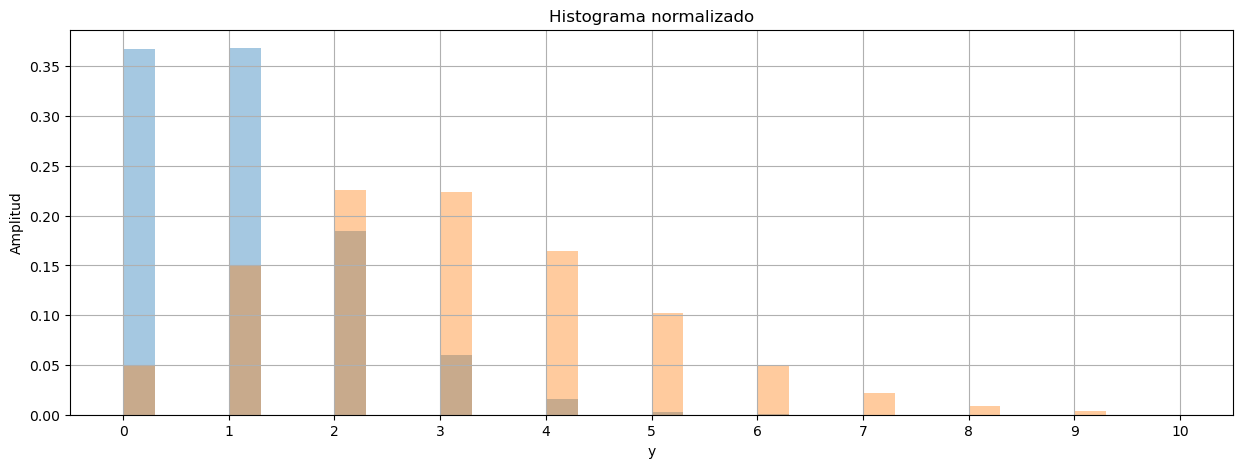

In [7]:
lambda0 = 1
lambda1 = 3
numberOfsamples = 50000

# Analizando la estadística
signal_received_h0 =  np.random.poisson(lambda0, numberOfsamples)  #Generadores con distribución de Poisson
signal_received_h1 = np.random.poisson(lambda1, numberOfsamples)   #Generadores con distribución de Poisso

plt.figure(figsize=(15,5))
plt.hist(signal_received_h0,bins = 10, range = (0,10), density = True , width = 0.3, align='mid', alpha = 0.4)
plt.hist(signal_received_h1, bins = 10 , range = (0,10), density = True , width =0.3, align='mid', alpha = 0.4)
plt.xlabel('y')
plt.xticks(range(0, 11))
plt.ylabel('Amplitud')
plt.title('Histograma normalizado')
plt.grid()
plt.show()

## Análisis cualitativo para la determinación del nivel de decisión
Mediante un análisis cualitativo de los histogramas, es posible determinar el nivel de decisión, llamado también nivel de referencia, que va a usar el receptor para decidir (decodificar) cual es la hipótesis que tiene más probabilidad de haber sido transmitida en cualquier instante de tiempo dado. Para determinar este nivel basta con encontrar en que valor de $y$ la frecuencia relativa de los histogramas se igualan o al menos se encuentran más próximas entre ellas. Para el caso de $λ_0 = 1$ y $λ_1 = 3$ se puede observar que el valor de decisión esta dado para un $y=2$.

## Análisis cuantitativo para la determinación del nivel de decisión: Regla de decisión de Máxima Verosimilitud.
Para el caso de hipótesis (H) equiprobables y observaciones (Y) discretas (que es el caso de nuestro ejemplo), la regla de decisión de máxima verosimilitud (del inglés Maximum Likelihood decision Rule) o ML, establece que la hipótesis transmitida más probable dada la observación Y en un instante de tiempo dado es aquella que cumple con la siguiente relación:

$\hat{H}(y)=  \underset{i\in \mathcal{H}}{\operatorname{argmax}} P_{Y|H}(y|i)$

Para el caso de test de hipótesis binaria (que es el caso de nuestro ejemplo) la regla de decisión ML queda simplificada a la siguiente expresión:

$P_{Y|H}(y|1)\overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless}P_{Y|H}(y|0)$

Si reemplazamos en esta relación a $P_{Y|H}(y|1)$ por $\frac{λ_1^y}{y!}e^{-λ_1}$ y a $P_{Y|H}(y|0)$ por $\frac{λ_0^y}{y!}e^{-λ_0}$ y utilizando las intensidades $λ_1=3$ y $λ_0=1$ se obtiene la siguiente inecuación:

$\frac{3^y}{y!}e^{-3}\overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless}\frac{1^y}{y!}e^{-1}$

Simplificando los denominadores, y juntando $y$

$\frac{3^y}{1^y}\overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless}\frac{e^{-1}}{e^{-3}}$

Aplicando propiedad de los exponentes:

$3^y\overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless}e^{2}$

$log_3 3^y\overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless}log_3 e^{2}$

$y\overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless}log_3 e^{2}$

Obtengo:

$y\overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless}1.8$

la cual nos está indicando que en teoría, el nivel de decisión del receptor debe estar ubicado un valor igual 1.8. Este resultado es coherente con el resultado obtenido en nuestro análisis cualitativo previo del problema.
Y se llega a lo indicado en el aula virtual.